# Classification de données

Dans cette partie du cours, vous allez entraîner par vous-même un modèle capable de classer une variété de fleur, comme vu au tout début de ce cours.

## Exploration des données

Nous allons ouvrir à nouveau le fichier 'iris_dataset.csv' contenu dans le dossier 'data'. Il n'y a pas besoin de préciser le nom des colonnes cette fois puisque ceux-ci ont été ajouté au fichier.


In [1]:
import pandas as pd
df = pd.read_csv('data/iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nous affichons les informations du DataFrame pour s'assurer qu'il ne manque aucune données:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Au cours précédent, vous avez ouvert ce fichier et produit différents graphiques, vous permettant ainsi de visualiser vos données et de vous en donner une nouvelle compréhension. Cette étape d'exploration des données est cruciale pour réussir à développer des modèles efficaces.

Nous pouvons observer la distribution des données avec la fonction ``value_counts()``.
Nous pouvons voir qu'il y a 3 classes différentes, ayant chacune 150 exemples. Nous avons donc à faire un un problème de classification multiclasses, et pour lequel les données sont équilibrées.

In [3]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='class'>

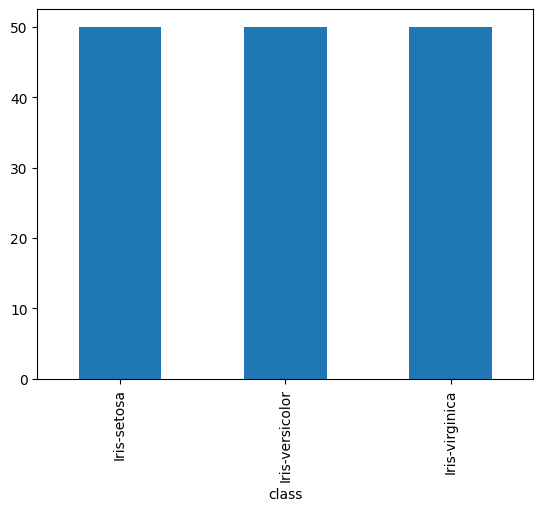

In [4]:
df['class'].value_counts().plot.bar()

La fonction ``scatter_matrix``de ``pandas``permet de générer plusieurs graphiques en un seul, dans lequel les différentes dimensions des données sont comparées. Les graphiques en diagonales présentent la distribution des données au travers d'un histogramme, tandis que les autres graphiques comparent les dimensions au travers d'un nuage de points.

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

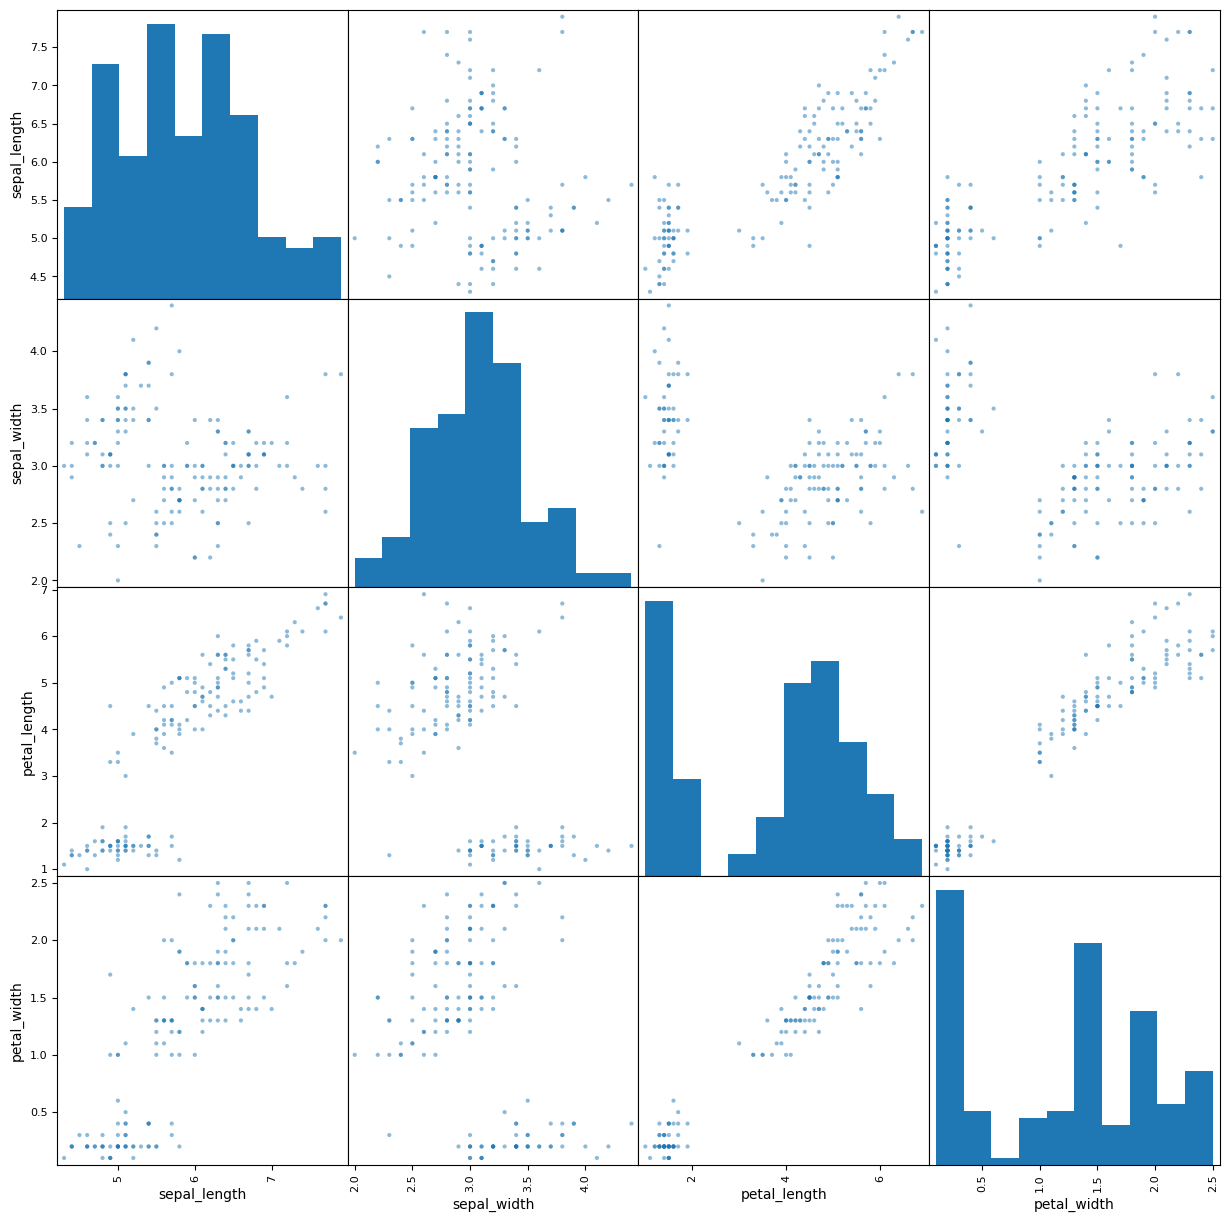

In [5]:
pd.plotting.scatter_matrix(df, figsize= (15, 15))

## Préparer les données

### Train, validation, test datasets

Nous voulons créer un modèle capable de classer de nouvelles fleurs parmis l'une des trois catégories possibles. Pour cela, nous avons besoin de **données d'entraînement** contenant des descriptions de différentes fleurs. En observant ces descriptions ainsi que la classe associée à chaque exemple, le modèle apprend de lui-même les paramètres permettant de prédire de nouveaux résultats.

Cependant, afin de voir si l'entraînement se déroule correctement et si le modèle s'améliore, il nous faut pouvoir évaluer le modèle. On a donc pour cela besoin de **données de validation**.  Parfois, les données de validation sont fournies avec les données d'entraînement, mais ce n'est pas toujours le cas. Ainsi en général, on créé les données de validation en prenant une portion des données d'entraînement. Traditionnellement, on conserve 70 - 80 ou 90% des données d'entraînement et on prend le reste pour les données de validation. 

Enfin, le but final d'un modèle est d'être mis en production afin qu'il catégorise de nouvelles données. Pour simuler cette situation, on utilise des **données de test**, qui sont des données que le modèle ne verra jamais au cours de l'entraînement.

Ainsi, on parle respectivement de **train(ing) set**, de **val(idation) ou de dev set** et de **test set**.



La plupart des jeux de données que l'on peut trouver sur Google, Kaggle ou Amazon ou dans le milieu de la recherche propose au moins le train et test dataset. Cependant, d'autres jeux de données tels que le Iris Flowers Dataset ne proposent que le train set, de façon similaires aux données que vous aurez à collecter par vous-mêmes.

Dans cette situation, on peut constituer le val dataset et / ou le test set à partir du train set. Un problème à ne pas oublier cependant est que cela réduit la taille du train set, et peut donc empirer l'entraînement. Ainsi, comme souvent, le plus de données vous avez, le meilleur.

## train_test_split

``train_test_split`` est une fonction proposée par scikit-learn permettant de diviser un dataset entre données d'entraînement et de test. Il divise par défaut les données en 75% pour le train set et 25% pour le test (on peut changer les proportions) après les avoir mélangées.

In [6]:
# pour rappel, la forme des données telle que fournie
data = df.iloc[:,:-1] # on enregistre les données dans une variable pour simplifier les manipulations
target = df['class']
print("Data Shape :", data.shape)
print("Target shape :", target.shape)

Data Shape : (150, 4)
Target shape : (150,)


In [9]:
# on importe la fonction train_test_split
from sklearn.model_selection import train_test_split

# on divise les données brutes en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, # les données d'entraînement
                                                    target, # les classes
                                                    train_size = .70 # taille alloué au train set par rapport à data
                                                    # test_size = .25 # taille allouée au test set par rapport à data. On utilise soit train_size, soit test_size
                                                    # random_state = 42 # définie la manière de mélanger les données. On l'utilise pour reproduire les résultats
                                                    )

# on regarde l'aspect des données d'entraînement
print("Train data Shape :", X_train.shape,  y_train.shape)
print("Test data Shape :", X_test.shape,  y_test.shape)


Train data Shape : (105, 4) (105,)
Test data Shape : (45, 4) (45,)


## Entraîner le modèle

Lorsque le train set et le test set sont prêts, on peut commencer à entraîner un modèle mathématique.
Dans un tâche d'apprentissage supervisé, l'objectif pour un modèle est de définir les meilleurs paramètres pour une certaine fonction à partir des données qui lui sont présentées. L'objectif à terme d'un modèle est d'être utilisé en production pour prédire des résultats à partir de nouvelles données qu'il n'a jamais vues. Ainsi, lors de l'entraînement d'un modèle, il est important d'évaluer sa capacité à **généraliser**. 

Il existe plusieurs dizaines d'algorithmes dédiés à différents types de problèmes en Machine Learning, la plupart étant déjà implémentés dans ``scikit-learn``.
Il faut insister sur le fait qu'il n'y a pas de recettes magique en Machine Learning : un modèle qui produit d'excellents résultats sur un problème peut ne pas du tout fonctionner sur un autre. Il faut donc toujours expérimenter et tester plusieurs modèles, avec plusieurs paramètres, jusqu'à obtenir le modèle le plus performant.


### k-Nearest Neighbors

**k-Nearest Neighbors** est un des algorithmes les plus simples existants, mais qui peut largement suffir à de simples problèmes. Contrairement à d'autres modèles, celui-ci enregistre le train set. Lorsqu'il doit classer une nouvelle donnée, le modèle cherche le point dans le train set qui en est le plus proche puis lui assigne la même classe. 

Le **k** dans son nom correspond au nombre de points dans le train set sur lesquels le modèle va se baser pour comparer. Lorsque k est supérieur à 1, la classe assignée au nouveau point correspond à la classe la plus proche dans le voisinage k.

<img src = 'img/knn.gif'>
Référence: https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners/


## Important

Lorsqu'un modèle s'entraîne, il apprend les paramètres à partir des données d'entraînement. Cependant, il y a également des paramètres que l'on peut définir manuellement lorsque l'on créé le modèle lui-même et que l'on appelle ``hyperparamètres``. 

Ces paramètres sont très importants puisqu'ils auront une influence sur la manière dont le modèle s'entraînera, et peuvent donc avoir une influence sur les l'apprentissage (performances, temps, ...). Par exemple, le nombre de voisins que l'on définit à l'instantiation du KNeighborsCLassifier est un hyperparamètre.

In [11]:
# Instantier le modèle
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn


KNeighborsClassifier(n_neighbors=3)

Pour entraîner un modèle dans ``scikit-learn``, chaque algorithme possède une fonction ``fit()``. Cette fonction prend toujours en argument les données d'entraînement, et dans des cas d'apprentissage supervisé, prendra également les classes. 

In [12]:
# Entrainement
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Valider l'entraînement

Dans un cadre d'apprentissage supervisé, on utilise le validation set s'il est disponible, sinon le test set,  pour évaluer notre modèle. Il existe plusieurs métriques suivant le problème traité (classification, régression, ...). Pour la classification, on évalue généralement le modèle en termes de scores de **précision, rappel** et **f1**, où:
* La précision indique la justesse des prédictions
* Le rappel indique l'exhaustivité des prédicitions
* Le F1 est la moyenne des scores de précision et rappel



Chaque algorithme implémenté dans ``scikit-learn`` possède sa propre métrique, disponible avec la fonction ``score()``. 

De la même manière, tous les algorithmes disponibles dans ``scikit-learn`` possèdent une fonction ``predict()`` qui permet de traiter un nouveau point de donnée.

In [13]:
predictions = knn.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [14]:
X_test.shape

(45, 4)

In [16]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
131,7.9,3.8,6.4,2.0
89,5.5,2.5,4.0,1.3
38,4.4,3.0,1.3,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
10,5.4,3.7,1.5,0.2
71,6.1,2.8,4.0,1.3
86,6.7,3.1,4.7,1.5
126,6.2,2.8,4.8,1.8


On peut également accéder directement aux métriques à partir de ``scikit-learn``.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# par défaut, les métriques pour la classification sont prévues pour la classification binaires (0, 1)
# pour des classifications multiclasses, il faut spécifier comment faire la moyenne des scores
# voir la documentation de scikit-learn pour voir les différentes moyennes possibles
prec = precision_score(predictions, y_test, average="macro")
rec = recall_score(predictions, y_test, average="macro")
f1 = f1_score(predictions, y_test, average="macro")

print("Scores de Précision du modèle :", prec)
print("Scores de Rappel du modèle :", rec)
print("Scores F1 du modèle :", f1)

Scores de Précision du modèle : 0.9555555555555556
Scores de Rappel du modèle : 0.9583333333333334
Scores F1 du modèle : 0.953968253968254


In [19]:
from sklearn.metrics import classification_report

# la fonction classification_report produit un rapport d'évaluation pour chaque classe
# contenant les scores de Précision, Rappel et F1, ainsi que les scores moyens macro et micro
report = classification_report(y_test, predictions)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Matrice de confusion - Confusion matrix

Un des inconvénients du score de précision est qu'il ne donne qu'un aperçu général de la capacité du modèle à catégoriser des données. Même si un modèle est précis à 80% ou 90%, il reste toujours un pourcentage d'erreur à corriger, que le score de précision ne permet pas de consulter.

Pour mieux comprendre quelles catégories sont correctement et incorrectement annotées, on peut utiliser une **matrice de confusion**

In [20]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix :")
confusion_matrix(y_test, predictions)

Confusion matrix :


array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 13]])

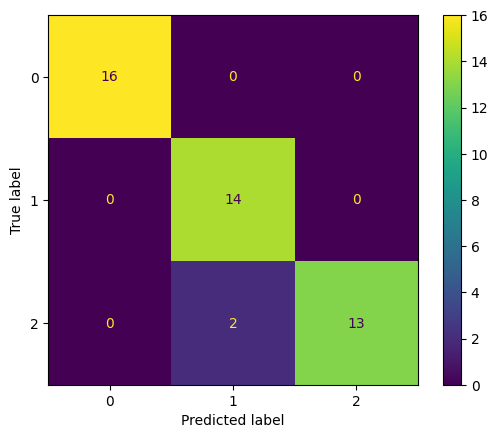

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, predictions, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Prédire de nouveaux résultats - Production

Notre modèle est entraîné et a obtenu d'excellents résultats au cours de l'entraînement. C'est donc le moment de le mettre en production et l'utiliser pour classer des données que l'on n'a jamais vues jusque l. 

In [30]:
import numpy as np
# on simule un nouveau point que l'on veut classer automatiquement


X_new = np.array([[5, 2.9, 1, 0.2]]
                 
                 )
print("Shape new data :", X_new.shape)
print('Prediction', knn.predict(X_new))


# X_new = np.array([[5, 2.9, 1, 0.2],
#                   [1, .9, 2, 0.6]
#                   ]
                 
#                  )
print("Shape new data :", X_new.shape)
print('Prediction', knn.predict(X_new))


Shape new data : (1, 4)
Prediction ['Iris-setosa']
Shape new data : (1, 4)
Prediction ['Iris-setosa']


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Encodage des classes

Les algorithmes utilisés en Machine Learning ne sont pas capables de traiter des données textuelles: ils ne peuvent que traiter des données numériques. La cellule précédente a retourné une erreur car la colonne 'class' ne contenait que des données textuelles. Ainsi, lorsque les jeux de données comportent du texte, il faut trouver un moyen de les transformer sous forme numérique. 

Ceci est relativement facile pour les classes dans des problèmes de classification, mais beaucoup plus difficile lorsque les données d'entraînement elles-mêmes sont textuelles. La recherche pour transformer numériquement du texte est un sujet d'étude à part entière en Traitement Automatique des Langues.

``scikit-learn`` propose deux méthodes pour automatiquement convertir des classes textuelles en classes numériques: ``LabelBinarizer`` et ``LabelEncoder``. ``LabelBinarizer`` permet d'encoder des classes binaires tandis que ``LabelEncoder`` permet d'encoder deux classes ou plus. 

Puisque notre jeu de données contient 3 classes, nous allons utiliser le ``LabelEncoder``:

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

``LabelEncoder`` fait partie d'un type particulier de modèle dans ``scikit-learn`` que l'on appelle un ``transformer``. Ces modèles ne servent pas à prédire une classes mais à transformer des données sous une autre forme. Ils possèdent tous une méthode ``fit()`` leur permettant de comprendre les propriétés des données ainsi qu'une méthode ``transform()`` leur permettant de transformer ces données.

In [32]:
label_encoder.fit(target) # On apprend la structure des données au transformer
transformed_target = label_encoder.transform(target) # on transforme les données

In [34]:
print('10 premières classes transformées: ', 
      transformed_target[-10:])
print('10 premières classes non transformées:', 
      target[-10:])

10 premières classes transformées:  [2 2 2 2 2 2 2 2 2 2]
10 premières classes non transformées: 140    Iris-virginica
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, dtype: object


In [35]:
# on peut toujours faire la transformation inverse 
# pour retrouver le nom d'origine de la classe
print('10 premières classes non transformées:',
      label_encoder.inverse_transform(transformed_target[:10]))

10 premières classes non transformées: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### Note

Certains algorithmes peuvent accepter des classes textuelles. Cependant par convention, il est préférable de toujours convertir les classes textuelles en classes numériques, d'autant plus que les algorithmes utilisés en Deep Learning eux n'acceptent que des données numériques.

Pour repasser des classes numériques aux classes textuelles (et inversement), on fait en sorte de créer un fichier de mapping permettant de lier les deux types de classes.

La propriété ``classes_`` du LabelEncoder permet de retrouver le noms des classes d'origines. On peut donc utiliser cette propriété pour créer notre fichier de mapping:

In [36]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
mapping_classes = {} # on crée un dictionnaire qui servirait de mapping
for i, classe in enumerate(label_encoder.classes_):
    # chaque index et nom de classe devient une clé dans le dictionnaire
    mapping_classes[i] = classe
    mapping_classes[classe] = i
    
print("mapping_classes: ",mapping_classes)
print("mapping_classes[0]: ", mapping_classes[0])
print("mapping_classes['Iris-setosa']: ", mapping_classes['Iris-setosa'])

mapping_classes:  {0: 'Iris-setosa', 'Iris-setosa': 0, 1: 'Iris-versicolor', 'Iris-versicolor': 1, 2: 'Iris-virginica', 'Iris-virginica': 2}
mapping_classes[0]:  Iris-setosa
mapping_classes['Iris-setosa']:  0


Bien que l'on puisse utiliser ce mapping directement, on en aura besoin plus tard lorsque le modèle sera mis en production, c'est-à-dire mis en ligne pour faire de nouvelles prédictions. On a donc besoin de sauvegarder le mapping sur le disque. 

Puisque l'on a créé un dictionnaire, nous allons sauvegarder le mapping au format ``json``:

In [38]:
import json

with open('data/iris_class_mapping.json', 'w') as f:
    json.dump(mapping_classes, f, indent=4)

Pour ne plus avoir à encoder la colonne des classes, nous allons remplacer cette dernière par les valeurs encodées puis sauvegarder le nouveau DataFrame sur le disque, afin de le réutiliser plus tard:

In [39]:
df['encoded_class'] = transformed_target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,encoded_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [40]:
df.to_csv('encoded_iris_dataset.csv', index=False)

## Régression logistique

L'algorithme de régression logistique est un des algorithmes principaux en machin-learning et en NLP. Il vise à identifier la corrélation entre des caractéristiques, afin de déterminer la probabilité qu'un événement se réalise (ex : quelle est la probabilité que cette phrase soit positive si telle et telle condition sont réunies ?). Ainsi, ce que va produire l'algorithme est une probabilité, donc une valeur entre 0 et 1 pour chacune des classes possibles. 

<img src='img/linreg.gif'>

In [1]:
X_train

NameError: name 'X_train' is not defined

In [2]:
# on divise les données brutes en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, # les données d'entraînement
                                                    transformed_target, # les classes transformées
                                                    train_size = .75
                                                    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'train_test_split' is not defined

In [42]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV() # instantiation du modele
lr.fit(X_train, y_train) # entrainement

LogisticRegressionCV()

In [43]:
lr_pred = lr.predict(X_test)
f1_lr = f1_score(y_test, lr_pred, average='macro') # test du modele
print("Logistic Regression F1 score :", f1_lr)

Logistic Regression F1 score : 0.9740129935032483


In [46]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
f1_knn = f1_score(y_test, knn_pred, average='macro')
print("KNN F1 score :", f1_knn)

KNN F1 score : 0.9474747474747476


Pour plus de clarté, visualisons au travers d'un diagramme à barres les performances des deux modèles:

<Axes: >

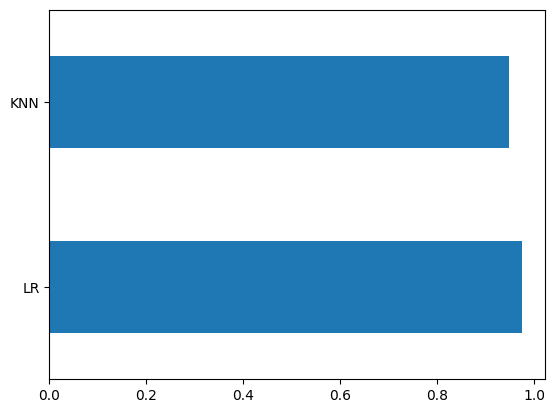

In [47]:
scores = pd.Series([f1_lr, f1_knn], index = ['LR', 'KNN'])
scores.plot.barh()

## Appfitting, underfitting, overfitting

Entraîner un modèle consiste à fournir des données à un algorithme de tel sorte qu'il apprenne de lui-même par essai-erreur les différents paramètres lui permettant de prédire de nouveaux résultats. 

Cependant, bien qu'il suffise de fournir les données à l'algorithme, entraîner correctement un modèle n'est pas si simple, et il est très fréquent de créer des modèles qui ne soient pas capables de généraliser. Cette difficulté à généraliser peut s'expliquer de deux manières : soit le modèle n'est pas capable d'apprendre les paramètres à partir des données, soit au contraitre il apprend ces paramètres beaucoup trop bien. Dans le premier cas, le modèle est "mal-entraîné" et prédit un résultat au hasard. Dans le second, le modèle a tellement bien appris à partir des données d'entraînement qu'il ne sait pas comment traiter de nouvelles données. 

En machine-learning, on parle respectivement d'``underfitting`` et d'``overfitting``


### Underfitting

L'underfitting désigne le cas où le modèle n'a pas appris correctement les paramètres à partir des données d'entraînement, et n'est donc pas capable de généraliser. On peut le repérer lorsque les résultats de l'entraînement ne sont pas concluants. 

En général, les cas d'underfitting sont dus à des données n'ayant pas assez de features. La meilleure façon donc d'y remédier est de transformer les données de telle sorte à obtenir plus de features. Cependant, les cas d'underfitting sont assez rares, précisémment à cause du fait que l'on a en général trop de features.

<img src="img/underfitting.png">

### Overfitting

L'**overfitting** désigne le cas inverse où un modèle apprend beaucoup trop bien les paramètres à partir des données d'entraînement, et n'apprend donc pas à généraliser. D'une certaine façon, le modèle apprend par coeur les caractéristiques des données d'entraînement sans les comprendre réellement. Il est donc incapable de généraliser, et donc de prédire correctement de nouveaux résultats.


<img src="img/overfitting.png">


En général, l'overfitting se détecte lorsque les performances du modèles sont largement supérieures sur les données d'entraînement que sur les données de test.
Contrairement à l'underfitting, l'overfitting est un des problèmes les plus souvent rencontrés en machine-learning. Il est généralement dû à un ``manque de données`` par rapport au problème traité ou bien à l'inverse ``un trop grand nombre de features``. Ainsi pour traiter l'overfitting, il faut soit d'obtenir (beaucoup) plus de données d'entraînement, soit de réduire le nombre de features.

### Note

Attention cependant à ne pas mettre un modèle de côté à cause d'un léger cas d'overfitting. Très souvent, les modèles ont tendance à l'overfit, sans que cela ne soit réellement impactant. Ainsi, on peut dire qu'un modèle généralise correctement si l'écart entre la précision de l'entraînement et du test est inférieur à 10%.

## Curse of dimensionality

Plus on fournit un grand nombre de données variées, et plus il est facile pour un modèle d'apprendre à généraliser. Pourtant, plus le nombre de dimensions de ces données augmente (donc plus le nombre de features augmente) et plus il est difficile pour un modèle d'identifier les corrélations entre elles. C'est ce que l'on appelle le ``Fléau de la dimension`` (Curse of dimensionality). 

En effet, plus l'on a de dimensions et plus l'espace entre elles augmente. Ainsi, il devient de plus en plus difficile de voir ce qui les lie. Si l'on reprend le vocabulaire de notre faux corpus:

### Appfitting

Ainsi, un modèle idéal est un modèle suffisamment complexe pour qu'il soit capable de s'adapter à de nouvelles données, mais ni trop complexe au point de s'adapter parfaitement aux données d'entraînement (overfitting), ni pas assez complexe au point de ne pas s'adapter du tout (underfitting).

<img src="img/appfitting.png">

## Références:


[Définition matrice de confusion (Wikipédia)]()

Documentations:

* Matrice de confusion:
    * Définition : https://fr.wikipedia.org/wiki/Matrice_de_confusion
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
    * https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

* Logistic Regression :
    * Jurafsky : https://web.stanford.edu/~jurafsky/slp3/5.pdf 
    * sklearn: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
    
* KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Présentation de jeux de données standards : https://machinelearningmastery.com/standard-machine-learning-datasets/
